In [902]:
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)

In [903]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set(color_codes=True)

**Load dataset**

In [904]:
bankData = pd.read_csv('/content/drive/MyDrive/ML_colab/bank.csv')

In [905]:
bankData.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [906]:
bankData.shape

(10000, 14)

There are 10000 rows and 14 columns.

In [907]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


1. There is no null values.
2. There are 3 variables of object type,2 of float64 and 9 variables of int64type.

In [908]:
bankData.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no null values.

In [909]:
bankData['CustomerId'].value_counts()

15812607    1
15741078    1
15635776    1
15740223    1
15738174    1
           ..
15743714    1
15639265    1
15641312    1
15684319    1
15695872    1
Name: CustomerId, Length: 10000, dtype: int64

CustomerId is unique, means they are unique customers.We can remove it from further analysis.

In [910]:

bankData['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Data contains people from 3 places France,Germany,Spain with majority from France.

In [911]:
bankData['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [912]:
bankData['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

It is imbalanced dataset.

In [913]:
bankData_copy = bankData.copy()

Since 'RowNumber','CustomerId' are unique we can drop them.Also we don't require surname.So we can drop them all.

**Drop the columns**

In [914]:
bankData_copy.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True) 

**Analysis**

In [915]:
bankData_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


1. Minimum credit score is 350 and max is 850.
2. Min age is 18 and max is 92.
3. Min Tenure is 0 and max is 10.
4. Min balance is 0 and max is 250898.09.0 seems to be a possible value.
5. Min NumOfProducts is 1 and max is 4.
6. HasCrCard is actually categorial in nature with two value 0 and 1.
7. IsActiveMember is also categorical in nature(0,1).
8. Min EstimatedSalary is 11.58 and max is 199992.48.
9. Exited is target variable(0,1).

In [916]:
df = bankData_copy[bankData_copy['Balance'] == 0.0]

In [917]:
df.shape

(3617, 11)

In [918]:
df[df['Exited'] == 1].shape

(500, 11)

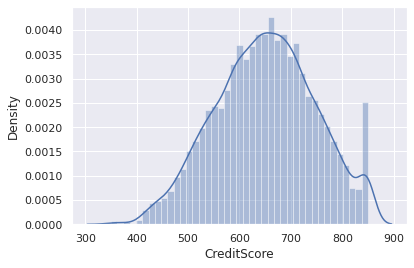

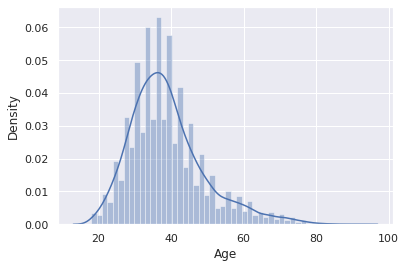

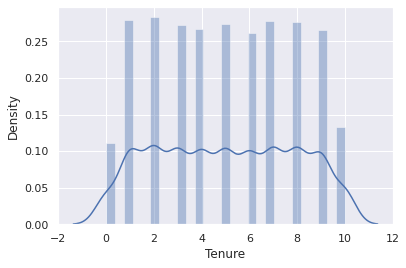

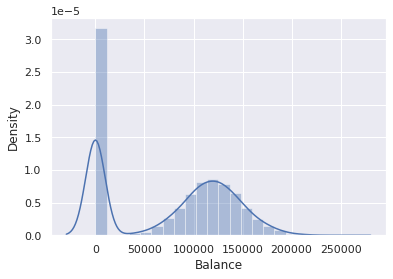

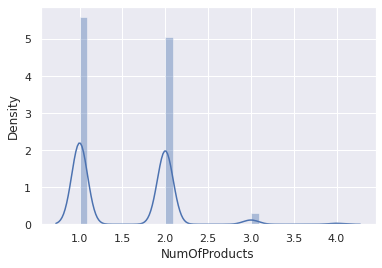

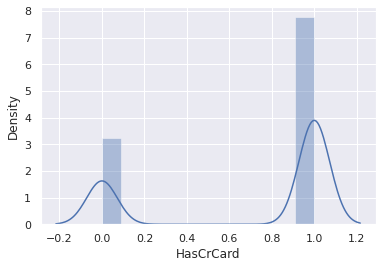

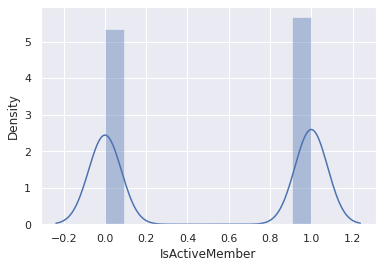

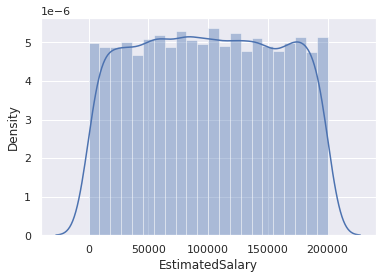

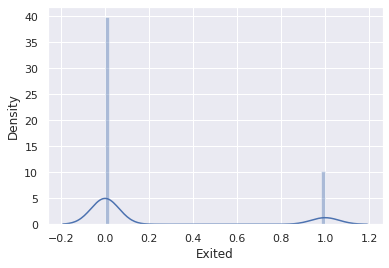

In [919]:
for i in bankData_copy.columns:
  if bankData_copy[i].dtype != 'object':
   sns.distplot(bankData_copy[i])
   plt.show();

1. CreditScore has a slight left tail.It is almost like a normal distribution except that there is one more peak a 850.
2. Age is right skewed.
3. People with 0 tenure are least in number.
4. There are lot of people with 0 balance. We need to check if this is possible value.It has a tail on right.
5. Most of the people have 1 product followed by 2,3,4.
Very less no. of people have 4 prodcuts.
6. More no. of people have creditCard.
7. There is very slight difference between no. of active and non-active members. Active members are slightly more in number.This should be a concern point why bank have so many non-active members.
8. There are almost same no. of people in different salary range.
9. There are more people who have not exited(imbalanced dataset).

In [920]:
pd.crosstab(bankData_copy['Geography'],bankData_copy['Exited'],normalize='index')  

Exited,0,1
Geography,,
France,0.838452,0.161548
Germany,0.675568,0.324432
Spain,0.833266,0.166734


In Germany more people have exited as compared to other places.

In [921]:
pd.crosstab(bankData_copy['Gender'],bankData_copy['Exited'],normalize='index')

Exited,0,1
Gender,,
Female,0.749285,0.250715
Male,0.835441,0.164559


More females have exited as compared to male.

In [922]:
pd.crosstab(bankData_copy['HasCrCard'],bankData_copy['Exited'],normalize='index')

Exited,0,1
HasCrCard,,
0,0.791851,0.208149
1,0.798157,0.201843


HasCrCard doesn't seems to be much related to Exited.

In [923]:
pd.crosstab(bankData_copy['IsActiveMember'],bankData_copy['Exited'],normalize='index')

Exited,0,1
IsActiveMember,,
0,0.731491,0.268509
1,0.857309,0.142691


Non-active members exited more than active members.

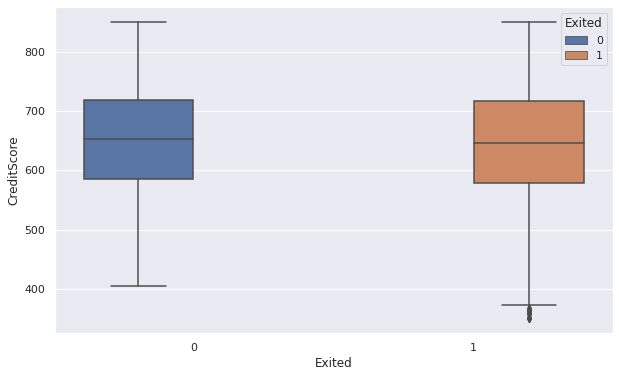

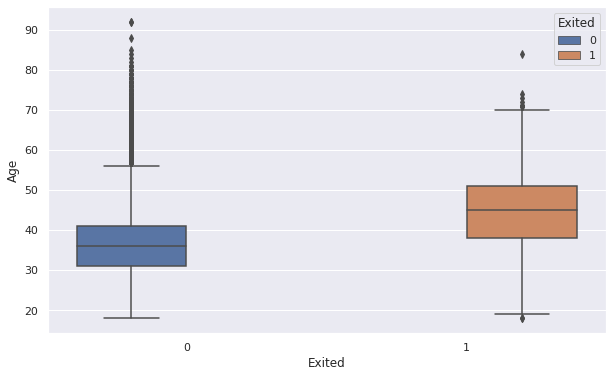

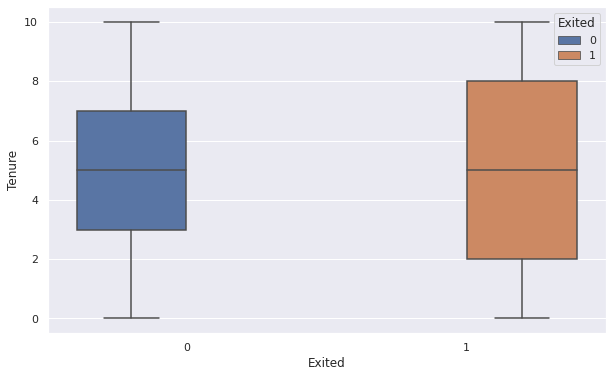

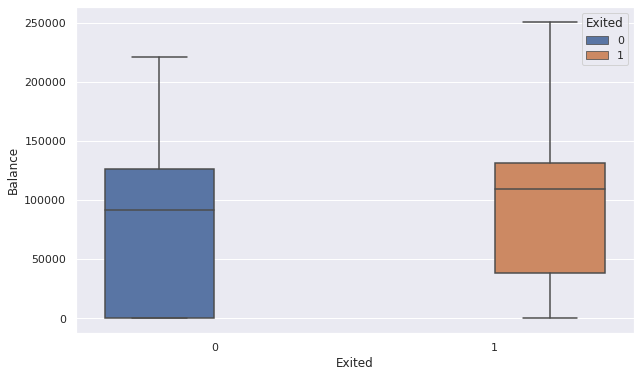

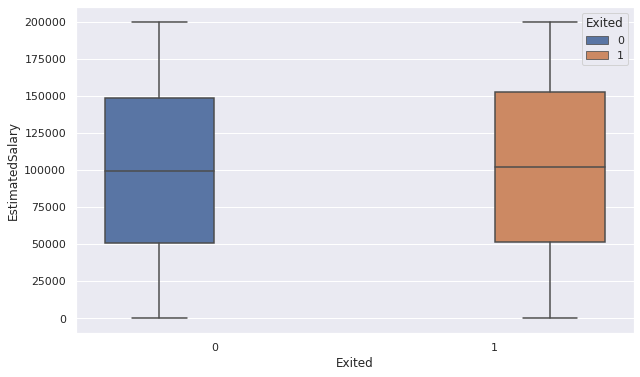

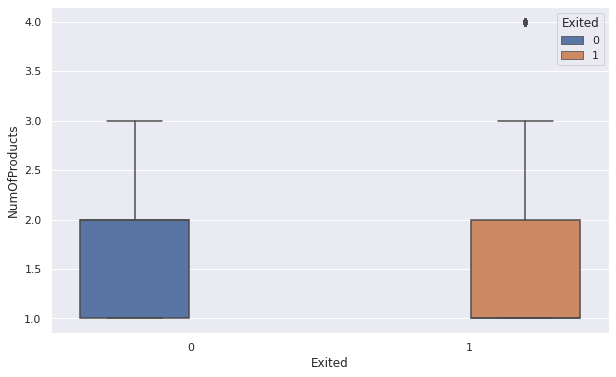

In [924]:
columns = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']
for i in columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(x='Exited',y=i,hue='Exited',data=bankData_copy);
  plt.show()

1. People with 300-400 creditScore have churned.For rest credit score it shows same as not churned people.
2. More older people are exiting as compared younger ones.
3. People with extreme tenure values(on lower end or upper end) are churning more.
4. People with more balance have exited the bank which is a concern point.
5. Salary doen't seems to effect churning.
6. People with 4 NumOfProducts have churned.

In [925]:
bankData_copy.drop(['EstimatedSalary'],axis=1,inplace=True)

**Dependent ,Indenpendent variables**

In [926]:
X = bankData_copy.drop('Exited',axis=1)
y = bankData_copy['Exited']

In [927]:
X = pd.get_dummies(X)
X = X.astype('float32')

**Split the data into train/test sets**

In [928]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=7)# splitted it into train/test/validation sets

**Normalize train/test sets**

In [929]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train

array([[ 0.76340145, -0.17813651,  0.33193696, ..., -0.5789999 ,
        -0.9163431 ,  0.9163431 ],
       [ 0.19301201, -1.7946265 , -0.35499835, ...,  1.7271162 ,
         1.0912943 , -1.0912943 ],
       [-0.6573868 ,  0.96291524,  0.33193696, ..., -0.5789999 ,
        -0.9163431 ,  0.9163431 ],
       ...,
       [ 1.3856444 ,  0.77273995,  1.3623399 , ..., -0.5789999 ,
         1.0912943 , -1.0912943 ],
       [ 1.4374981 , -0.7486624 , -1.0419337 , ..., -0.5789999 ,
         1.0912943 , -1.0912943 ],
       [ 0.4730214 , -0.84375006, -1.3854012 , ...,  1.7271162 ,
        -0.9163431 ,  0.9163431 ]], dtype=float32)

In [930]:
X_train=tf.convert_to_tensor(X_train)
y_train=tf.convert_to_tensor(y_train.values)
X_val=tf.convert_to_tensor(X_val)
y_val=tf.convert_to_tensor(y_val.values)
X_test=tf.convert_to_tensor(X_test)
y_test=tf.convert_to_tensor(y_test.values)

In [931]:
X_train.shape

TensorShape([5600, 12])

In [932]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization

**Initialize the model**

In [933]:
model = Sequential()
model.add(Dense(12,activation='relu',input_shape=[X_train.shape[1]]))
model.add(Dense(1,activation='sigmoid'))

**Build the model**

In [934]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
#opt = tf.keras.optimizers.SGD(lr=0.001)
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])

In [935]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val),batch_size=256)

Epoch 1/10
22/22 [==============================] - 1s 10ms/step - loss: 0.5563 - accuracy: 0.7288 - val_loss: 0.4604 - val_accuracy: 0.8000
Epoch 2/10
22/22 [==============================] - 0s 3ms/step - loss: 0.4221 - accuracy: 0.8169 - val_loss: 0.4362 - val_accuracy: 0.8057
Epoch 3/10
22/22 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8327 - val_loss: 0.4194 - val_accuracy: 0.8179
Epoch 4/10
22/22 [==============================] - 0s 3ms/step - loss: 0.3960 - accuracy: 0.8428 - val_loss: 0.4069 - val_accuracy: 0.8307
Epoch 5/10
22/22 [==============================] - 0s 3ms/step - loss: 0.3872 - accuracy: 0.8481 - val_loss: 0.3942 - val_accuracy: 0.8329
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: 0.3626 - accuracy: 0.8559 - val_loss: 0.3850 - val_accuracy: 0.8364
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 0.3578 - accuracy: 0.8623 - val_loss: 0.3775 - val_accuracy: 0.8479
Epoch 8/10
22/22 [=

**Tried out with different iterations:-**
1. With SGD optimizer,epochs = 50,val_accuracy = 80.73
2. With Adam ,epochs = 10 ,val_accuracy = 85.6
3. With RMSprop,epochs =10, val_accuracy = 85.8
4. With RMSprop,epochs = 20,val_accuracy = 82.2 which is less than training accuracy = 84.5 which means overfitting.
5. With RMSprop,epochs =10, val_accuracy = 86.1 with no. of neurons increased from 9 to 12.

In [936]:
y_pred = model.predict(X_test)

In [937]:
y_pred

array([[0.30312085],
       [0.06687787],
       [0.01721835],
       ...,
       [0.00599086],
       [0.01617184],
       [0.22807783]], dtype=float32)

**Predict the results using 0.5 as threshold**

In [938]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [939]:
y_test

<tf.Tensor: shape=(3000,), dtype=int64, numpy=array([1, 0, 0, ..., 0, 0, 0])>

**Accuracy and confusion matrix**

In [940]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [941]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2395
           1       0.76      0.43      0.55       605

    accuracy                           0.86      3000
   macro avg       0.81      0.70      0.73      3000
weighted avg       0.85      0.86      0.84      3000



Overall accuracy is 86% but recall is very low 43% for class 1.This should be improved.

Text(0.5, 12.5, 'Predicted label')

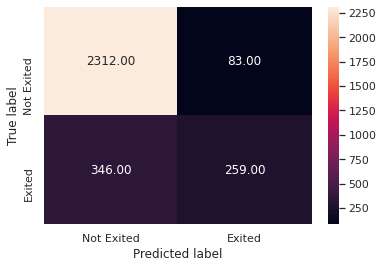

In [942]:
conf_mat = confusion_matrix(y_test,y_pred)
confMatDf = pd.DataFrame(conf_mat,index=['Not Exited','Exited'],columns=['Not Exited','Exited'])
sns.heatmap(confMatDf,annot=True,fmt='.2f');
plt.ylabel('True label')
plt.xlabel('Predicted label')

We have correctly identified 259 customers who have churned.But since the churning customer have high bank balance,losing such customer will be a loss to bank.So we should improve recall to identify them and let's say talk to them,give them some offers or services which can change their mind of exiting the bank. In trying to increase recall,we will definitely increase false positive(identify people who have not churned as churned) but people who are not going to churn will also like if they are being talked or given offers and services.So the aim is to improve recall.

Let's try to improve recall.

In [943]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.3,random_state=1)

In [944]:
counts = y_train.value_counts()
weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]
print(weight_for_0)
print(weight_for_1)

0.00025693730729701953
0.000992063492063492


In [945]:
X_train=tf.convert_to_tensor(X_train)
y_train=tf.convert_to_tensor(y_train.values)
X_val=tf.convert_to_tensor(X_val)
y_val=tf.convert_to_tensor(y_val.values)
X_test=tf.convert_to_tensor(X_test)
y_test=tf.convert_to_tensor(y_test.values)

Using BatchNormalization for scaling instead of using StandardScaler.

In [946]:
model1 = Sequential()
model1.add(BatchNormalization(input_shape=[X_train.shape[1]]))
model1.add(Dense(12,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(1,activation='sigmoid'))

In [947]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
#opt = tf.keras.optimizers.SGD(lr=0.001)
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
class_weight = {0: weight_for_0, 1: weight_for_1}
model1.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])

In [948]:
model1.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val),batch_size=256,class_weight=class_weight)

Epoch 1/10
20/20 [==============================] - 1s 12ms/step - loss: 3.1135e-04 - accuracy: 0.4983 - val_loss: 0.4975 - val_accuracy: 0.8086
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 2.4941e-04 - accuracy: 0.6598 - val_loss: 0.4917 - val_accuracy: 0.8076
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 2.3385e-04 - accuracy: 0.7006 - val_loss: 0.5639 - val_accuracy: 0.7876
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 2.1219e-04 - accuracy: 0.7351 - val_loss: 0.5334 - val_accuracy: 0.7943
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 2.0713e-04 - accuracy: 0.7622 - val_loss: 0.4994 - val_accuracy: 0.7938
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 1.9745e-04 - accuracy: 0.7674 - val_loss: 0.5076 - val_accuracy: 0.7790
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 1.9684e-04 - accuracy: 0.7736 - val_loss: 0.5100 - val_accuracy

In [949]:
y_pred = model1.predict(X_test)
y_pred

array([[0.19491583],
       [0.29448766],
       [0.48837644],
       ...,
       [0.08642244],
       [0.1789957 ],
       [0.61442894]], dtype=float32)

In [950]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [951]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      2373
           1       0.47      0.75      0.57       627

    accuracy                           0.77      3000
   macro avg       0.69      0.76      0.71      3000
weighted avg       0.83      0.77      0.79      3000



Text(0.5, 12.5, 'Predicted label')

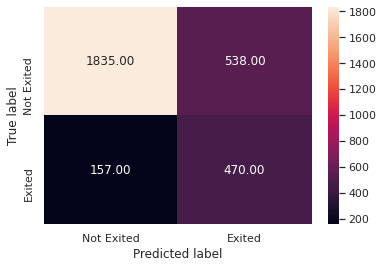

In [952]:
conf_mat1 = confusion_matrix(y_test,y_pred)
confMatDf1 = pd.DataFrame(conf_mat1,index=['Not Exited','Exited'],columns=['Not Exited','Exited'])
sns.heatmap(confMatDf1,annot=True,fmt='.2f');
plt.ylabel('True label')
plt.xlabel('Predicted label')

With this model, we have increase recall to 75% which is better than 1st model.Overall accuracy has decreased to 77% but since recall is more important than overall accuracy in this case, we can consider this model.We can also try to improve recall further.